In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SOCR-HeightWeight.csv')

In [3]:
df.drop("Index", axis = 1, inplace=True)

In [4]:
df

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


In [5]:
height = np.array(df['Height(Inches)'])*2.54
weight = np.array(df['Weight(Pounds)'])*0.453

In [6]:
df['Weight'] = weight
df['Height'] = height

In [7]:
df.drop(['Height(Inches)', 'Weight(Pounds)'],inplace = True, axis = 1)

In [8]:
df

,Weight,Height
0,51.185603,167.089607
1,61.828747,181.648633
2,69.321186,176.272800
3,64.477936,173.270164
4,65.366586,172.181037
...,...,...
24995,53.468134,176.535461
24996,54.447520,163.952580
24997,53.574272,164.334317
24998,59.917495,171.524117


In [9]:
df.describe()

,Weight,Height
count,25000.000000,25000.000000
mean,57.566978,172.702509
std,5.282387,4.830264
min,35.340686,153.107034
25%,54.046830,169.429170
50%,57.602461,172.709078
75%,61.106461,175.953312
max,77.428572,190.888112


In [10]:
df.head()

,Weight,Height
0,51.185603,167.089607
1,61.828747,181.648633
2,69.321186,176.272800
3,64.477936,173.270164
4,65.366586,172.181037


Text(0.5, 1.0, 'Height and Weight distribution')

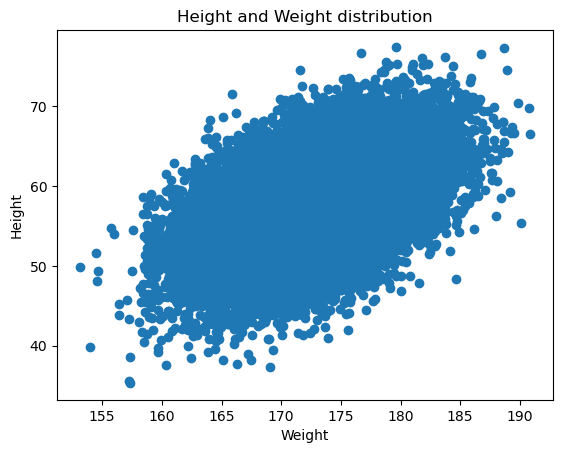

In [11]:
plt.scatter(height, weight)

plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height and Weight distribution')

In [12]:
df.corr()  #shows correlation

,Weight,Height
Weight,1.000000,0.502859
Height,0.502859,1.000000


C:\Users\Vishwajeet Yaduraj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


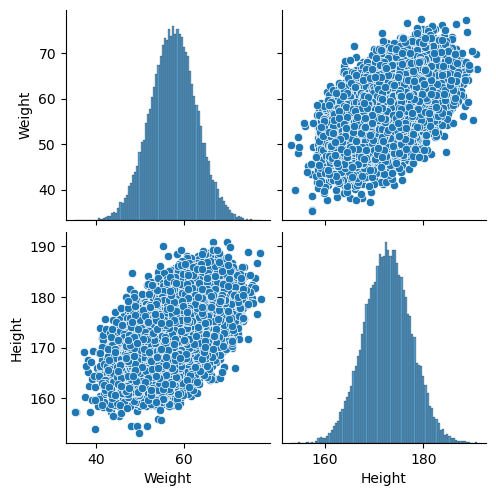

In [13]:
import seaborn as sns
sns.pairplot(df)

In [14]:
X = df[['Weight']]
y = df['Height']

In [15]:
X.shape

(25000, 1)

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.25)

In [18]:
## Standardization

from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
X_test

array([[-0.28217508],
       [-0.0258702 ],
       [-1.13698533],
       ...,
       [ 0.29502592],
       [-1.18024643],
       [-0.17094082]])

Apply Linear regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regression = LinearRegression(n_jobs=-1)

In [24]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [25]:
print('The slope or Coefficient',regression.coef_)    # β1
print('The intercept', regression.intercept_)

The slope or Coefficient [2.44312493]
The intercept 172.70279628061868


 Plot the best fit line

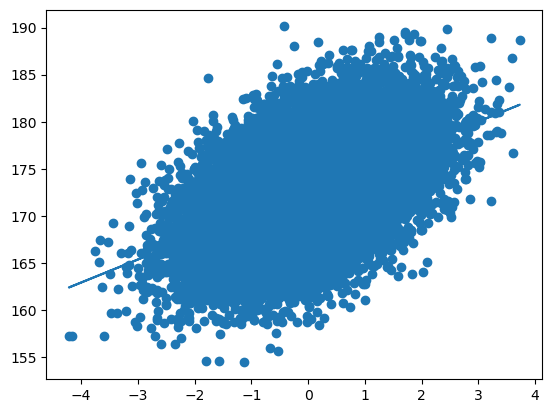

In [26]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [27]:
## Prediction for test data.

In [28]:
y_pred = regression.predict(X_test)

In [29]:
y_pred

array([172.01340731, 172.63959216, 169.92499908, ..., 173.42358145,
       169.8193068 , 172.2851665 ])

In [30]:
y_test

20255    167.626513
15840    160.258201
3127     171.842557
18934    178.111582
21382    164.612980
            ...    
11203    175.850499
22287    173.586216
3374     177.908077
17971    177.486691
8097     170.440858
Name: Height, Length: 6250, dtype: float64

In [31]:
## Performance metris

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [34]:
print(mse)
print(mae)
print(rmse)

17.880773328591165
3.369776996541172
4.228566344352559


In [35]:
## R squared 

In [36]:
from sklearn.metrics import r2_score

In [37]:
score = r2_score(y_test, y_pred)
print(score)

0.24140959216045121


In [38]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.24128817884293519

In [39]:
## Lets try with OLS model

In [40]:
import statsmodels.api as sm

In [41]:
result = sm.OLS(y_train, X_train).fit()

In [42]:
prediction = result.predict(X_train)
print(prediction)

[ 0.80171107  0.42212058  0.54958044 ... -1.17244884  4.85802994
  2.53040903]


In [43]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.750
Date:                Sun, 17 Mar 2024   Prob (F-statistic):                      0.0528
Time:                        23:42:37   Log-Likelihood:                     -1.2320e+05
No. Observations:               18750   AIC:                                  2.464e+05
Df Residuals:                   18749   BIC:                                  2.464e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.4431      1.262      1.936      0.053      -0.030       4.916
==============================================================================
Omnibus:                        0.280   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.260
Skew:                          -0.006   Prob(JB):                        0.878
Kurtosis:                       3.014   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
## Prediction for new Data

In [47]:
regression.predict(scaler.transform([[68]]))

C:\Users\Vishwajeet Yaduraj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([177.52710016])

In [46]:
## My friend who is 55 and 5 ft 6 inch is coming out to be just under 5. LOL....The dataset we took was hilarious